|  Sunrise logo | ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|---|

#### This notebook is licensed under GPL 3.0. Please visit our Github repo for more information: https://github.com/edgi-govdata-archiving/ECHO-COVID19
#### The notebook was collaboratively authored by EDGI following our authorship protocol: https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/
#### For more information about this project, visit https://www.environmentalenforcementwatch.org/

## How to Run
* A "cell" in a Jupyter notebook is a block of code performing a set of actions making available or using specific data.  The notebook works by running one cell after another, as the notebook user selects offered options.
* If you click on a gray **code** cell, a little “play button” arrow appears on the left. If you click the play button, it will run the code in that cell (“**running** a cell”). The button will animate. When the animation stops, the cell has finished running.
![Where to click to run the cell](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/pressplay.JPG?raw=true)
* You may get a warning that the notebook was not authored by Google. We know, we authored them! It’s okay. Click “Run Anyway” to continue. 
![Error Message](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/master/Jupyter%20instructions/warning-message.JPG?raw=true)
* **It is important to run cells in order because they depend on each other.**
* Run all of the cells in a Notebook to make a complete report. Please feel free to look at and **learn about each result as you create it**!

# **Let's begin!** 
These first two cells give us access to some external Python code we will need. Hover over the "[ ]" on the top left corner of the cell below and you should see a "play" button appear. Click on it to run the cell then move to the next one.
### 1.  Bring in some code that is stored in a Github project.

In [1]:
!git clone -b sunrise --single-branch https://github.com/ericnost/ECHO_modules.git
!git clone https://github.com/edgi-govdata-archiving/ECHO-Geo.git
!git clone https://github.com/edgi-govdata-archiving/ECHO-Sunrise.git # This has the utilities file for mapping and make_data_sets.py

Cloning into 'ECHO_modules'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 30 (delta 8), reused 19 (delta 5), pack-reused 0
Unpacking objects: 100% (30/30), done.
Cloning into 'ECHO-Geo'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 7), reused 9 (delta 3), pack-reused 0
Unpacking objects: 100% (24/24), done.
Cloning into 'ECHO-Sunrise'...
remote: Enumerating objects: 232, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (198/198), done.
remote: Total 232 (delta 106), reused 131 (delta 32), pack-reused 0
Receiving objects: 100% (232/232), 9.66 MiB | 3.46 MiB/s, done.
Resolving deltas: 100% (106/106), done.


### 2.  Run some external Python modules.

In [2]:
# Import code libraries
%run ECHO_modules/DataSet.py
%run ECHO-Sunrise/utilities.py
import pandas as pd
!pip install geopandas &>/dev/null;
import geopandas
!apt update  &>/dev/null;
!apt install gdal-bin python-gdal python3-gdal  &>/dev/null;
!apt install python3-rtree  &>/dev/null;
import rtree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import csv
import datetime
import ipywidgets as widgets

### 3. What facilities does EPA track in Mass?
This may take just a little bit of time to load - there are thousands! The next two blocks of code will load in the data and give you a preview of it.

In [3]:
echo_data_sql = "select * from ECHO_EXPORTER where FAC_STATE = 'MA' and FAC_ACTIVE_FLAG='Y'"
try:
    #print(echo_data_sql)
    echo_data = get_data( echo_data_sql, 'REGISTRY_ID' )
    num_facilities = echo_data.shape[0]
    print("\nThere are %s facilities in Massachussets currently tracked in the ECHO database." %(num_facilities))
except pd.errors.EmptyDataError:
    print("\nThere are no facilities in this region.\n")

select * from ECHO_EXPORTER where FAC_STATE = 'MA' and FAC_ACTIVE_FLAG='Y'

There are 24270 facilities in Massachussets currently tracked in the ECHO database.


/Users/Eric/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (5,119) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
echo_data

FAC_NAME  \
REGISTRY_ID                                                   
110000759830        FAIRHAVEN WASTEWATER TREATMENT FACILITY   
110033139672                                EVERGREEN SOLAR   
110070550630                            STEM MIDDLE ACADEMY   
110070384306                                     ADDGENEINC   
110024346395                        ADVANCE AUTO PARTS 1636   
110070525304                   EDCO DRILLING AND HONING INC   
110003459427                               STEVES AUTO BODY   
110025389577                                    OILTEST INC   
110070431808                                     SHAWS 3413   
110003370281                         SERVICE CONNECTION THE   
110003481367             MOBIL OIL / STATE STREET MOBIL INC   
110024306008                        CONSUMER AUTO PARTS INC   
110007039258                            LEE SCHOOL DISTRICT   
110024346420                                LINCOLN VILLAGE   
110070550746                        OREILLY AUTO PARTS 5896   
110003412192                                    YRC FREIGHT   
110056372321                               METRO VOLKSWAGEN   
110022830800                                 IMMUNETICS INC   
110070501704       O'DONNELL FUNERAL HOME BUILDING ADDITION   
110064849669                       SEVENTH SENSE BIOSYSTEMS   
110008404823                     NATIONAL GRID LNG FACILITY   
110070697794                       FELLSWAY AUTO REPAIR INC   
110070431880  AUBURN PUBLIC SCHOOLS ADMINISTRATION BUILDING   
110000311788          REVERE COPPER PRODUCTS PLANT - CLOSED   
110008412020                                 MITRE CORP THE   
110024375040                                   FIVE BIOTECH   
110001940179                  GLOBAL EXPERIENCE SPECIALISTS   
110038276843                         CREATIVE CHEMICALS INC   
110070694910                  NORTHEASTERN UNIVERSITY - EXP   
110003475917                            GREYHOUND LINES INC   
...                                                     ...   
110000310681                                  POLAROID CORP   
110003477899                   JIFFY LUBE - MARLBOROUGH, MA   
110003438824                     PALMERS AUTOMOTIVE SERVICE   
110003458419                                METRO AUTO BODY   
110003480796                 HYNES MICHAEL J AUTO REPAIR IN   
110003418249                           CERAMIC COATINGS INC   
110012862189                         CRESCENT VALLEY CONDOS   
110003434944                                   AB GROUP THE   
110043939986                     MEDEIROS AUTO BODY & SALES   
110051966155                                   ATHENS PIZZA   
110054611327                                      AM CASTLE   
110024317210                            MARR SCAFFOLDING CO   
110013183429                     NORTHBRIDGE WATER DIVISION   
110003462896                        BEVERLY FIRE DEPARTMENT   
110051929491                   BERKSHIRE COUNTRY DAY SCHOOL   
110043922397                            KEYSTONE AUTOMOTIVE   
110070563984                  NORTHBRIDGE ELEMENTARY SCHOOL   
110046471714                                     SHAWS 2571   
110070000113                          OLD DEERFIELD W W T P   
110070525362                      LONG LIFE AUTO REPAIR LLC   
110009590692                          OBRIEN J J & SONS INC   
110043946825                              CVS PHARMACY 0006   
110070380217                 PARTNERS HEALTHCARE - BRIGHAMS   
110070667513                             ROGERS STREET PARK   
110070253968                    UNICUS PHARMACEUTICALS, LLC   
110040447022                                  CIRCLE K 7511   
110070254017                                17 HILLSIDE AVE   
110003466614                   MALDEN MIDDLESEX MOTOR SALES   
110070716997                           JJ SULLIVAN PLUMBING   
110038921129                        ADVANCE AUTO PARTS 6932   

                                                FAC_STREET  \
REGISTRY_ID        

### 4.  Run this next cell to create to choose how you want to *zoom in* on the data: what specific programs you want to look at and whether you want to view this information by county, congressional district or zip code.
Here's where you can learn more about the different programs...

In [14]:
# Only list the data set if it has the correct flag set.
%run ECHO-Sunrise/make_data_sets.py
data_sets=make_data_sets()

data_set_choices = []
for k, v in data_sets.items():
    if ( v.has_echo_flag( echo_data ) ):
        data_set_choices.append( k )

data_set_widget=widgets.Dropdown(
    options=list(data_set_choices),
    description='Data sets:',
    disabled=False,
    value='Greenhouse Gases'
) 
display(data_set_widget)

region_field = { 
    #'Congressional District': { "field": "cd" },
    'County': { "field": "county" },
    'State Districts': { "field": "state_districts" },
    'Town': {"field": "town"},
    #'Watershed': {"field": "watershed"},
    #'Zip Code': { "field": "zip" },
}

style = {'description_width': 'initial'}
select_region_widget = widgets.Dropdown(
    options=region_field.keys(),
    style=style,
    value='State Districts',
    description='Region of interest:',
    disabled=False
)
display( select_region_widget )

Dropdown(description='Data sets:', index=3, options=('Air Violations', 'Air Compliance', 'Combined Air Emissio…

Dropdown(description='Region of interest:', index=1, options=('County', 'State Districts', 'Town'), style=Desc…

### 5. Here are all the facilities in this program
This may take some time because we're looking at all incidents under this program for all facilities across the state!

First, let's get all the data from the database.

In [23]:
program = data_sets[ data_set_widget.value ]
program_data = None

my_prog_data=get_program_data(echo_data, program, program_data)
my_prog_data=pd.DataFrame(my_prog_data)
#my_prog_data=my_prog_data.loc[(my_prog_data["UNIT_OF_MEASURE"]=="Pounds")] # for Combined Air Emissions, remove GHG reporting
my_prog_data

ANNUAL_EMISSION                                            DFR_URL  \
0            9602.500  http://echo.epa.gov/detailed-facility-report?f...   
1           15134.000  http://echo.epa.gov/detailed-facility-report?f...   
2           20495.000  http://echo.epa.gov/detailed-facility-report?f...   
3           18660.000  http://echo.epa.gov/detailed-facility-report?f...   
4           20030.000  http://echo.epa.gov/detailed-facility-report?f...   
5              17.582  http://echo.epa.gov/detailed-facility-report?f...   
6              14.750  http://echo.epa.gov/detailed-facility-report?f...   
7              14.000  http://echo.epa.gov/detailed-facility-report?f...   
8              14.750  http://echo.epa.gov/detailed-facility-report?f...   
9           28732.100  http://echo.epa.gov/detailed-facility-report?f...   
10             18.178  http://echo.epa.gov/detailed-facility-report?f...   
11             14.500  http://echo.epa.gov/detailed-facility-report?f...   
12          31283.000  http://echo.epa.gov/detailed-facility-report?f...   
13             17.880  http://echo.epa.gov/detailed-facility-report?f...   
14          29978.200  http://echo.epa.gov/detailed-facility-report?f...   
15          30314.300  http://echo.epa.gov/detailed-facility-report?f...   
16             15.750  http://echo.epa.gov/detailed-facility-report?f...   
17             14.750  http://echo.epa.gov/detailed-facility-report?f...   
18             16.390  http://echo.epa.gov/detailed-facility-report?f...   
19             16.250  http://echo.epa.gov/detailed-facility-report?f...   
20          31126.900  http://echo.epa.gov/detailed-facility-report?f...   
21             13.750  http://echo.epa.gov/detailed-facility-report?f...   
22          30813.300  http://echo.epa.gov/detailed-facility-report?f...   
23             17.880  http://echo.epa.gov/detailed-facility-report?f...   
24          28954.500  http://echo.epa.gov/detailed-facility-report?f...   
25          31536.800  http://echo.epa.gov/detailed-facility-report?f...   
26          33697.900  http://echo.epa.gov/detailed-facility-report?f...   
27             17.284  http://echo.epa.gov/detailed-facility-report?f...   
28             18.774  http://echo.epa.gov/detailed-facility-report?f...   
29             20.264  http://echo.epa.gov/detailed-facility-report?f...   
...               ...                                                ...   
2214          569.750  http://echo.epa.gov/detailed-facility-report?f...   
2215          856.750  http://echo.epa.gov/detailed-facility-report?f...   
2216          576.500  http://echo.epa.gov/detailed-facility-report?f...   
2217        22093.000  http://echo.epa.gov/detailed-facility-report?f...   
2218          566.000  http://echo.epa.gov/detailed-facility-report?f...   
2219        25488.200  http://echo.epa.gov/detailed-facility-report?f...   
2220        34638.900  http://echo.epa.gov/detailed-facility-report?f...   
2221          538.500  http://echo.epa.gov/detailed-facility-report?f...   
2222          562.000  http://echo.epa.gov/detailed-facility-report?f...   
2223        39180.700  http://echo.epa.gov/detailed-facility-report?f...   
2224          894.298  http://echo.epa.gov/detailed-facility-report?f...   
2225        25643.800  http://echo.epa.gov/detailed-facility-report?f...   
2226            3.500  http://echo.epa.gov/detailed-facility-report?f...   
2227        19550.000  http://echo.epa.gov/detailed-facility-report?f...   
2228          274.400  http://echo.epa.gov/detailed-facility-report?f...   
2229            2.700  http://echo.epa.gov/detailed-facility-report?f...   
2230         8057.750  http://echo.epa.gov/detailed-facility-report?f...   
2231        10878.750  http://echo.epa.gov/detailed-facility-report?f...   
2232        33547.500  http://echo.epa.gov/detailed-facility-report?f...   
2233        30327.500  http://echo.epa.gov/detailed-facility-report?f...   
2234          291.300  http://echo.epa.gov/detailed-fa

And map it:

In [24]:
fac = my_prog_data.drop_duplicates(subset=["Index"])
map_of_facilities = mapper_marker(fac)
map_of_facilities

### 6. Here are the geographies we're going to summarize this information at

In [71]:
# Read in and map geojson for the selected geography
geo = region_field[select_region_widget.value]["field"].lower()
geo_json_data = geopandas.read_file("ECHO-Geo/ma_"+geo+".geojson")

# Get rid of any null geographies
for geom in geo_json_data.iterrows():
    if(geom[1]["geometry"]==None):
        geo_json_data=geo_json_data.drop(geom[0])
        
m = folium.Map(
    #tiles='Mapbox Bright',
)
folium.GeoJson(
    geo_json_data,
).add_to(m)

bounds = m.get_bounds()
m.fit_bounds(bounds)

m

### 7. Now we bring the geographic data and the facility data together. First, let's rank each geography.

In [72]:
gdf = geopandas.GeoDataFrame(
    my_prog_data, crs= "EPSG:4326", geometry=geopandas.points_from_xy(my_prog_data["FAC_LONG"], my_prog_data["FAC_LAT"]))

join = geopandas.sjoin(gdf, geo_json_data, how="inner", op='intersects')

join.to_csv("full_program_data.csv")

# get geo and attribute data column names
geo_column = {"county": "COUNTY", "state_districts": "REP_DIST", "town": "town"} # EXPAND
att_column = {"Greenhouse Gases": {"col":"ANNUAL_EMISSION", "agg":"sum"},
              "Air Inspections": {"col": "ACTIVITY_TYPE_CODE", "agg": "count"},
              "Clean Water Inspections": {"col":"ACTIVITY_TYPE_CODE", "agg":"count"},
              "Combined Air Emissions": {"col":"ANNUAL_EMISSION", "agg":"sum"}
             } # EXPAND
g = geo_column[geo]
a = att_column[program.name]["col"]

data = join.groupby(join[g])[[a]].agg(att_column[program.name]["agg"])
data.to_csv("geos_ranked.csv")
data=data.sort_values(by=a, ascending = False)
data

ANNUAL_EMISSION
COUNTY                     
MIDDLESEX      3.777322e+07
BRISTOL        2.638697e+07
NORFOLK        2.533697e+07
WORCESTER      2.208715e+07
ESSEX          1.787330e+07
HAMPDEN        1.073491e+07
PLYMOUTH       9.017692e+06
SUFFOLK        5.148998e+06
BERKSHIRE      2.899780e+06
HAMPSHIRE      1.512007e+06
BARNSTABLE     1.159464e+06
FRANKLIN       2.505429e+05

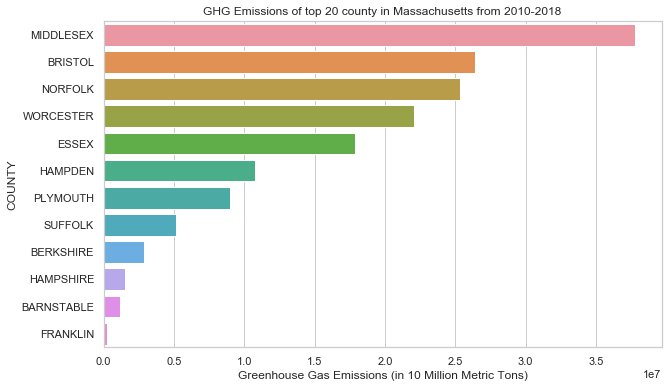

In [73]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
unit = data[0:19].index # First 20 rows 
values = data[0:19][a] # First 20 rows
sns.barplot(values, unit) 

plt.title('GHG Emissions of top 20 %s in Massachusetts from 2010-2018' %(geo))
plt.xlabel('Greenhouse Gas Emissions (in 10 Million Metric Tons)')

plt.show()

### 8. Now, let's map it!

In [74]:
data.reset_index(inplace=True)
att_data = data.rename(columns={g: "geo", a: "value"}) 
mp = mapper_area(geo_json_data, att_data, g)
mp

### 9. Rank individual facilities

In [75]:
ranked = my_prog_data.groupby(["Index", "FAC_NAME", "FAC_LAT", "FAC_LONG"])[[a]].agg(att_column[program.name]["agg"])
ranked.reset_index(inplace=True)
ranked = ranked.set_index("Index")
ranked.to_csv("facilities_ranked.csv")
ranked.sort_values(by=a, ascending=False)

FAC_NAME    FAC_LAT   FAC_LONG  \
Index                                                                           
110000310841    CONSTELLATION MYSTIC GENERATING STATION  42.390500 -71.067300   
110028092597  DOMINION ENERGY BRAYTON POINT POWER PLANT  41.709989 -71.192441   
110024352289              FORE RIVER GENERATING STATION  42.241669 -70.965851   
110000312028          SEMASS RESOURCE RECOVERY FACILITY  41.802300 -70.787500   
110024360458                 ANP BELLINGHAM POWER PLANT  42.109971 -71.452954   
110017410425     ANP BLACKSTONE ENERGY GENERATING PLANT  42.059776 -71.515203   
110002028635                     MILLENNIUM POWER PLANT  42.112351 -72.015097   
110000310976                         GENON KENDALL, LLC  42.363464 -71.079669   
110009023065         COVANTA RESOURCE RECOVERY FACILITY  42.765400 -71.124025   
110001938609        MILLBURY RESOURCE RECOVERY FACILITY  42.220700 -71.767300   
110001950112           NESWC RESOURCE RECOVERY FACILITY  42.726075 -71.122203   
110040452676       NATIONAL GRID CORPORATE HEADQUARTERS  42.396463 -71.271237   
110000310459                       SALEM HARBOR STATION  42.525500 -70.877000   
110000732565         WHEELABRATOR WASTE TO ENERGY PLANT  42.447211 -70.980472   
110002059361                      BERKSHIRE POWER PLANT  42.048067 -72.647927   
110000308444            MASSPOWER COGENERATION FACILITY  42.156979 -72.522369   
110001937922                        DIGHTON POWER PLANT  41.831268 -71.124005   
110000310486           BELLINGHAM COGENERATION FACILITY  42.093255 -71.481610   
110000881733            MEDICAL AREA TOTAL ENERGY PLANT  42.336667 -71.108333   
110002152795                     MIT COGENERATION PLANT  42.360920 -71.093260   
110001944353                        MILFORD POWER PLANT  42.128148 -71.514298   
110000308523                   SPECIALTY MINERALS, INC.  42.643200 -73.113500   
110000308435       SOLUTIA CHEMICAL MANUFACTURING PLANT  42.154981 -72.526419   
110001948046            VEOLIA - STEAM GENERATING PLANT  42.349750 -71.057967   
110000311485             GENON CANAL GENERATING STATION  41.769800 -70.509100   
110043952283                NSTAR DBA EVERSOURCE ENERGY  42.204460 -71.159370   
110038498792                        UMASS HEATING PLANT  42.389978 -72.537008   
110011136653            COVANTA RESOURCE RECOVERY PLANT  42.090524 -72.590858   
110000308480          PITTSFIELD GENERATING POWER PLANT  42.454880 -73.217340   
110000581086      HOLYOKE WATER POWER MOUNT TOM STATION  42.280600 -72.605400   
...                                                 ...        ...        ...   
110042258268                          WELLESLEY COLLEGE  42.295930 -71.298930   
110024302958                            NEW ENGLAND GAS  41.702850 -71.163120   
110000308612                         ERVING PAPER MILLS  42.600080 -72.378380   
110010426084                LOGAN INTERNATIONAL AIRPORT  42.368120 -71.009410   
110040447674              MIDDLEBOROUGH LANDFILL & TRAN  41.928430 -70.834540   
110001944291                        FALL RIVER LANDFILL  41.752400 -71.105200   
110000602900               KRAFT ATLANTIC GELATIN PLANT  42.477336 -71.115135   
110024348437                   OLDCASTLE STONE PRODUCTS  42.300790 -73.250840   
110000309470   INTEL FAB 17 SEMICONDUCTOR MANUFACTURING  42.379380 -71.556960   
110000846693                                   POLARTEC  42.717020 -71.179900   
110024333960     TAUNTON LANDFILL & GAS ENERGY RECOVERY  41.922990 -71.086477   
110012166440                     BONDIS ISLAND LANDFILL  42.091040 -72.597480   
110024370919         BOURNE LANDFILL & TRANSFER STATION  41.731171 -70.583757   
110012199405      SOUTH HADLEY LANDFILL & RECYCLING CTR  42.219930 -72.556870   
110008415465                      BFI RANDOLPH LANDFILL  42.180149 -71.076812   
110031262862                  HOLYOKE SANITARY LANDFILL  42.227281 -72.547189   
110003491908         LANDFILL & GAS GENERATING FACILITY  42.387400 -72.079490 

### 10. Map individual facilities

In [34]:
ranked['quantile'] = pd.qcut(ranked[a], 4, labels=False, duplicates="drop")
mp = mapper_circle(ranked, a)
mp

### 11. Are these facilities near prisons, detention centers, and jails?
We will try to answer this question using ECHO data. It it is important to note that ECHO data has significant gaps. As the [Carceral Ecologies](https://github.com/Carceral-Ecologies/Carceral-ECHO-data) project is finding out, ECHO does not fully cover these kinds of facilities. It could be that not all are regulated by the EPA, and so they wouldn't appear in ECHO. Or, they could be regulated by the EPA, but be missing from ECHO anyway.

In addition, we will use NAICS codes, which classify facilities according to their purpose, and which are included in ECHO records. The [NAICS code](https://www.naics.com/naics-code-description/?code=922140) for prisons, detention centers, and jails is 922140. However, if one of these kinds of facilities is not actually classified as 922140, for whatever reason, then we won't catch it.

A different question is, _what_ industrial facilities are near prisons, detention centers, and jails? That will be a separate analysis, forthcoming.

First, here are the prisons, detention centers, and jail identified in ECHO.

In [35]:
naics = echo_data.loc[(echo_data["FAC_NAICS_CODES"].notna())] # We can only look at facilities that have at least one NAICS code
pdcjs = naics.loc[(naics["FAC_NAICS_CODES"].str.contains("922140"))]
mapper_marker(pdcjs)

In the following cell, we show the facilities under the selected program that fall within a 5 mile radius of a prison, detention center, or jail.

The prisons/detention centers/jails are the small orange dots, the 5 mile buffers around them are the blue circles, and the blue pins are the facilities regulated under the program you selected above (e.g. Greenhouse Gases) that fall within this 5 mile buffer.

In [36]:
from geopandas import GeoSeries

pdcjs = geopandas.GeoDataFrame(pdcjs, crs = "EPSG:4326", geometry=geopandas.points_from_xy(pdcjs["FAC_LONG"], pdcjs["FAC_LAT"]))
pdcjs=pdcjs.to_crs("EPSG:32615") # Project
b = pdcjs.buffer(8100) # Create 8100 m or ~ 5 mile radius bufffer around each prison, detention center, and jail

fac = geopandas.GeoDataFrame(ranked, crs = "EPSG:4326", geometry=geopandas.points_from_xy(ranked["FAC_LONG"], ranked["FAC_LAT"]))
fac=fac.to_crs("EPSG:32615") # Project

i = fac.loc[fac.intersects(b.unary_union)] # Clip program facilities to the buffer

m = folium.Map(
    #tiles='Mapbox Bright',
)
folium.GeoJson(
    b,
).add_to(m)
for index, row in pdcjs.iterrows():
    folium.CircleMarker(
        location = [row["FAC_LAT"], row["FAC_LONG"]],
        popup = row["FAC_NAME"], 
        radius = 4,
        color = "black",
        weight = 1,
        fill_color = "orange",
        fill_opacity= .4
    ).add_to(m)
for index, row in i.iterrows():
    folium.Marker(
        location = [row["FAC_LAT"], row["FAC_LONG"]],
        popup = row["FAC_NAME"] + ": " + str(row[a])
    ).add_to(m)

bounds = m.get_bounds()
m.fit_bounds(bounds)

m